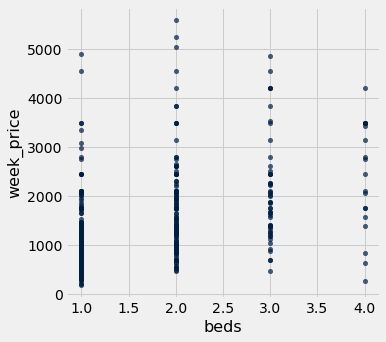

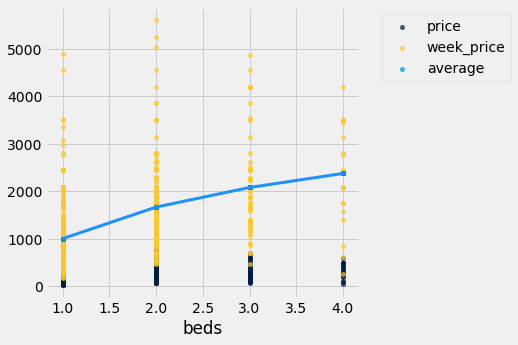

In [98]:
import copy

from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

bed_price = Table.read_table('bed_price.csv')
# there are roughly 9000 different Airbnb
# we just parse it by roughly 15, so 600 left
bed_price = bed_price.take(np.arange(0, bed_price.num_rows, 15))

# we need to take out the outliers
def no_outliers(table, col):
    average = np.mean(table.column(col))
    std = np.std(table.column(col))
    # only need 1.2 standard deviations
    # this covers roughly 76 percent of the graph if we assume the graph is normal
    return table.where(col, are.between(average-1.2*std,average+1.2*std))

bed_price = no_outliers(bed_price, "week_price")

# categorize tables by the number of beds
one_bed = bed_price.where("beds", are.equal_to(1))
two_bed = bed_price.where("beds", are.equal_to(2))
three_bed = bed_price.where("beds", are.equal_to(3))
four_bed = bed_price.where("beds", are.equal_to(4))

# we don't really need to consider when there are more than 4 beds
# the price of Airbnb with more than 4 beds could be 
# totally different, because there is only a certain group of ppl
# book with more than 4 beds
under4 = bed_price.where("beds", are.below(5))
graph = under4.scatter("beds","week_price")

def predict_price(average):
    # Return a prediction of the average price for each bed
    close_points = under4.where('beds', are.equal_to(average))
    return close_points.column('week_price').mean()

under4_predict = under4.with_column("average", under4.apply(predict_price, 'beds'))
under4_predict.scatter("beds")

average_one = under4_predict.where("beds", are.equal_to(1)).column("average")[0]
average_two = under4_predict.where("beds", are.equal_to(2)).column("average")[0]
average_three = under4_predict.where("beds", are.equal_to(3)).column("average")[0]
average_four = under4_predict.where("beds", are.equal_to(4)).column("average")[0]

plots.plot([1, 2], [average_one, average_two], color='dodgerblue', lw=3)
plots.plot([2, 3], [average_two, average_three], color='dodgerblue', lw=3)
plots.plot([3, 4], [average_three, average_four], color='dodgerblue', lw=3)
